<a href="https://colab.research.google.com/github/ivanozono/clasificacion-arboles-machine-learning/blob/main/DecisionTreeRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clasificación con Árbol de Decisión y Random Forest**

In [1]:
# 1. Cargar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Librerías

En esta sección se importan las librerías necesarias para realizar el análisis de clasificación. A continuación se describen sus funciones principales:

- `pandas`: Para la manipulación y análisis de datos estructurados.
- `train_test_split` de `sklearn.model_selection`: Para dividir el dataset en conjuntos de entrenamiento y prueba.
- `DecisionTreeClassifier` y `plot_tree` de `sklearn.tree`: Para construir y visualizar un modelo de Árbol de Decisión.
- `RandomForestClassifier` de `sklearn.ensemble`: Para construir un modelo más robusto basado en múltiples árboles (Random Forest).
- `classification_report` y `accuracy_score` de `sklearn.metrics`: Para evaluar el rendimiento de los modelos con métricas estándar de clasificación.
- `matplotlib.pyplot` y `seaborn`: Para la visualización de datos y resultados, permitiendo un análisis más intuitivo y comunicativo.

Estas herramientas forman la base del pipeline de Machine Learning, desde la preparación de los datos hasta la evaluación de los modelos.

In [2]:
# 2. Cargar dataset de ejemplo
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

##  Carga del Dataset de Ejemplo

En este paso se utiliza el clásico dataset **Iris**, disponible en `scikit-learn`, ideal para tareas de clasificación multiclase. El objetivo es predecir la especie de una flor iris basada en características numéricas de sus pétalos y sépalos.

- `load_iris()`: Carga el dataset Iris, que incluye 150 observaciones de flores con 4 atributos: largo y ancho del sépalo y del pétalo.
- `pd.DataFrame(...)`: Se convierte el conjunto de datos en un DataFrame de `pandas`, asignando nombres de columnas significativos (`data.feature_names`).
- `df['target'] = data.target`: Se agrega una columna adicional llamada `target`, que contiene la clase o especie de cada flor (0 = Setosa, 1 = Versicolor, 2 = Virginica).

Este dataset se utiliza frecuentemente en proyectos de clasificación para comparar el rendimiento de diferentes algoritmos de Machine Learning.

In [3]:
# 3. División de datos
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  División de Datos

En este paso se prepara el conjunto de datos para el entrenamiento y evaluación de los modelos:

- `X = df.drop('target', axis=1)`: Se definen las **características (features)** del modelo, eliminando la columna objetivo.
- `y = df['target']`: Se define la **variable objetivo (target)** que se desea predecir, es decir, la especie de la flor.
- `train_test_split(...)`: Se divide el dataset en dos subconjuntos:
  - **80% para entrenamiento (`X_train`, `y_train`)**
  - **20% para prueba (`X_test`, `y_test`)**
  
Se utiliza `random_state=42` para asegurar que los resultados sean reproducibles en futuras ejecuciones del código.

Esta separación permite evaluar el rendimiento del modelo sobre datos no vistos, validando su capacidad de generalización.

In [4]:
# 4. Modelo Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

##  Entrenamiento del Modelo: Árbol de Decisión

En esta etapa se entrena un modelo de clasificación utilizando un **Árbol de Decisión**, un algoritmo interpretable que divide los datos en función de condiciones lógicas basadas en los atributos.

- `DecisionTreeClassifier(random_state=42)`: Se instancia el clasificador con una semilla fija para resultados reproducibles.
- `dt.fit(X_train, y_train)`: El modelo aprende las reglas de decisión a partir del conjunto de entrenamiento.
- `y_pred_dt = dt.predict(X_test)`: Se generan predicciones sobre el conjunto de prueba, utilizando el árbol entrenado.

Este enfoque es útil para explicar decisiones y detectar patrones simples de forma jerárquica. Sin embargo, los árboles únicos pueden sobreajustarse fácilmente, por lo que se evaluará también un modelo más robusto en la siguiente sección.

In [5]:
# 5. Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

##  Entrenamiento del Modelo: Random Forest

En este paso se entrena un **Random Forest**, un algoritmo de ensamble que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

- `RandomForestClassifier(n_estimators=100, random_state=42)`: Se crea un modelo compuesto por 100 árboles. Cada árbol se entrena con una muestra diferente del conjunto de entrenamiento y una selección aleatoria de características.
- `rf.fit(X_train, y_train)`: El modelo aprende patrones complejos y más generalizables a partir del conjunto de entrenamiento.
- `y_pred_rf = rf.predict(X_test)`: Se generan predicciones con el modelo entrenado para evaluar su rendimiento.

**Ventajas clave del Random Forest:**
- Mayor precisión que un único árbol.
- Menor riesgo de sobreajuste.
- Permite analizar la importancia de las variables predictoras.

Este modelo es ideal cuando se busca una buena combinación entre rendimiento y estabilidad en problemas de clasificación.

In [6]:
# 6. Evaluación
print("\n--- Árbol de Decisión ---")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


--- Árbol de Decisión ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


##  Evaluación del Rendimiento del Modelo

En esta sección se evalúan y comparan los modelos entrenados (Árbol de Decisión y Random Forest) utilizando métricas estándar de clasificación.

- `classification_report(...)`: Muestra métricas detalladas como:
  - **Precision**: Proporción de verdaderos positivos entre todas las predicciones positivas.
  - **Recall**: Proporción de verdaderos positivos entre todos los casos reales positivos.
  - **F1-score**: Media armónica entre precisión y recall, útil en casos de clases desbalanceadas.
- `accuracy_score(...)`: Porcentaje de predicciones correctas sobre el total de observaciones del conjunto de prueba.

Se imprimen los resultados para ambos modelos, permitiendo comparar directamente su desempeño. Esto es fundamental para decidir cuál modelo implementar o desplegar en un entorno de negocio real.

**Ejemplo de análisis esperado:**
> Si el Random Forest muestra una mejor F1-score y mayor precisión general sin pérdida de interpretabilidad clave, podría ser preferido como modelo final.

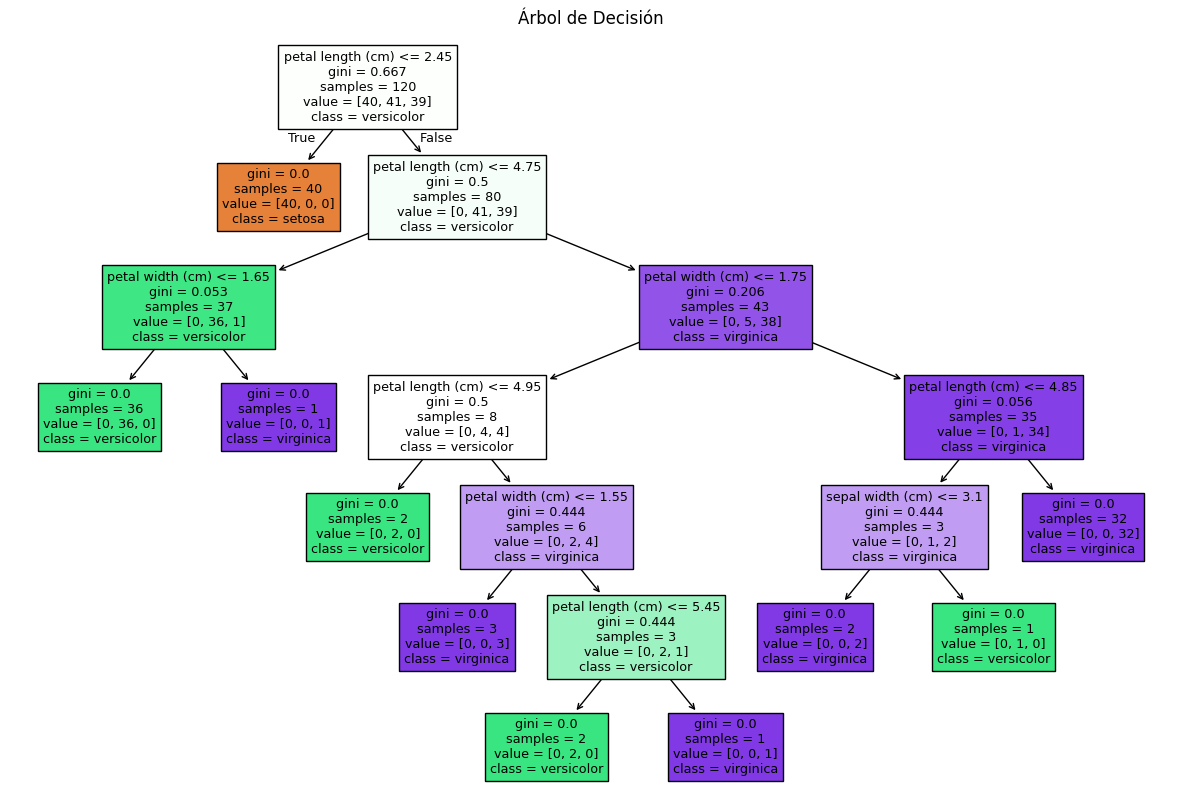

In [7]:
# 7. Visualización del árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Árbol de Decisión")
plt.show()

##  Visualización del Árbol de Decisión

En este paso se genera una visualización gráfica del Árbol de Decisión entrenado, lo cual permite entender cómo el modelo toma decisiones en función de las características del dataset.

- `plt.figure(figsize=(15,10))`: Define el tamaño de la figura para asegurar legibilidad.
- `plot_tree(...)`: Dibuja el árbol entrenado con:
  - `feature_names`: Nombres de las características (atributos).
  - `class_names`: Nombres de las clases (especies de iris).
  - `filled=True`: Colorea los nodos según la clase predominante, facilitando la interpretación.
- `plt.title(...)`: Título descriptivo para la gráfica.
- `plt.show()`: Muestra la visualización en pantalla.

Esta representación es útil para **explicar decisiones a públicos no técnicos**, detectar reglas clave y validar el comportamiento del modelo. Aunque los árboles profundos pueden volverse difíciles de leer, esta visualización sigue siendo una ventaja clave del modelo de decisión.

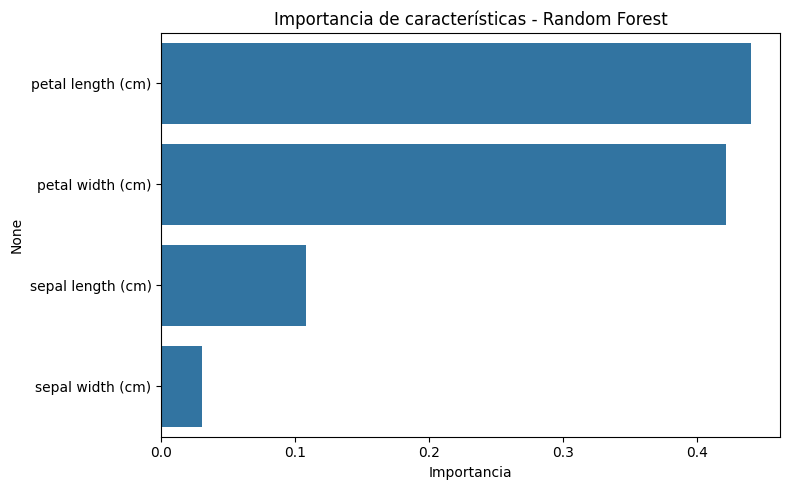

In [8]:
# 8. Importancia de características (Random Forest)
importances = rf.feature_importances_
features = pd.Series(importances, index=data.feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=features.values, y=features.index)
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

##  Importancia de Características (Random Forest)

Esta sección analiza qué características del dataset fueron más relevantes para el modelo de Random Forest al tomar decisiones.

- `rf.feature_importances_`: Extrae los niveles de importancia de cada característica en el modelo entrenado. Estas importancias reflejan cuán útiles fueron las variables para reducir el error en los árboles.
- `pd.Series(...).sort_values(...)`: Crea una serie ordenada con las características y sus importancias, facilitando la visualización.

### Visualización
- `sns.barplot(...)`: Genera un gráfico de barras horizontal para mostrar visualmente la importancia de cada variable.
- `plt.title(...)`, `plt.xlabel(...)`: Añaden contexto visual al gráfico.
- `plt.tight_layout()`: Ajusta automáticamente los elementos para una mejor presentación.

Esta visualización permite **identificar las variables más influyentes**, facilitando decisiones como:
- Eliminación de variables poco informativas.
- Priorización de variables clave para el negocio.
- Comunicación del modelo a stakeholders no técnicos.

Es un recurso fundamental en proyectos donde la **interpretabilidad y la toma de decisiones informadas** son críticas.

In [9]:
# 9. Guardar el modelo
import joblib
joblib.dump(rf, 'modelo_random_forest.pkl')

['modelo_random_forest.pkl']

##  Guardado del Modelo Entrenado

En esta última etapa se guarda el modelo de Random Forest entrenado en un archivo `.pkl`, lo cual permite reutilizarlo sin necesidad de reentrenarlo cada vez.

- `import joblib`: Se importa la librería `joblib`, recomendada para serializar objetos complejos como modelos de Machine Learning.
- `joblib.dump(rf, 'modelo_random_forest.pkl')`: Guarda el modelo `rf` (Random Forest) en un archivo llamado `modelo_random_forest.pkl`.

Este archivo puede ser:
- Cargado más adelante para hacer predicciones sobre nuevos datos.
- Integrado en una aplicación (web, móvil, API).
- Versionado y almacenado como parte de un pipeline de despliegue en producción.

**Ventaja:** Permite separar el entrenamiento del uso del modelo, lo cual es clave en flujos de trabajo profesionales de Machine Learning (MLOps).

In [10]:
# 10. Cargar el modelo y hacer predicciones
modelo_cargado = joblib.load('modelo_random_forest.pkl')
nuevas_predicciones = modelo_cargado.predict(X_test)

# Verificamos que las predicciones sean iguales a las anteriores
print("¿Predicciones coinciden?:", all(nuevas_predicciones == y_pred_rf))

¿Predicciones coinciden?: True


##  Carga del Modelo Guardado y Predicciones

Este bloque demuestra cómo reutilizar el modelo previamente guardado para hacer nuevas predicciones, sin necesidad de reentrenarlo.

- `joblib.load('modelo_random_forest.pkl')`: Carga el archivo `.pkl` que contiene el modelo entrenado.
- `modelo_cargado.predict(X_test)`: Se usan los mismos datos de prueba para generar predicciones y validar que el modelo cargado funciona correctamente.

La línea final compara si las predicciones del modelo cargado coinciden con las obtenidas antes del guardado:
```python
all(nuevas_predicciones == y_pred_rf)